<a href="https://colab.research.google.com/github/RusnaAida24/Advancing-Movie-Recommendation-Systems-with-Neural-Collaborative-Filtering/blob/main/MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [4]:
df1=pd.read_csv("/content/ratings.csv")
df2=pd.read_csv("/content/movies.csv")

In [5]:
# Merge dataframes
merged_df = pd.merge(df1, df2, on='movieId')
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [6]:
merged_df.shape

(100836, 6)

In [7]:
merged_df.isnull()

,userId,movieId,rating,timestamp,title,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
100831,False,False,False,False,False,False
100832,False,False,False,False,False,False
100833,False,False,False,False,False,False
100834,False,False,False,False,False,False


In [8]:
merged_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
# Preprocess the dataset (you may need to adapt this based on your dataset structure)
user_ids = merged_df['userId'].unique()
movie_ids = merged_df['movieId'].unique()
num_users, num_movies = len(user_ids), len(movie_ids)

In [10]:
# Create mapping dictionaries for user and movie IDs
user_id_map = {old_id: new_id for new_id, old_id in enumerate(user_ids)}
movie_id_map = {old_id: new_id for new_id, old_id in enumerate(movie_ids)}

In [11]:
# Map user and movie IDs to new indices
merged_df['user_idx'] = merged_df['userId'].map(user_id_map)
merged_df['movie_idx'] = merged_df['movieId'].map(movie_id_map)

In [12]:
# Split the dataset
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

In [13]:
# Define input layers
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')

# Define user and movie embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=10, input_length=1)(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=10, input_length=1)(movie_input)

# Flatten the embeddings
user_flat = Flatten()(user_embedding)
movie_flat = Flatten()(movie_embedding)

# Concatenate the flattened embeddings
concatenated = Concatenate()([user_flat, movie_flat])

# Fully connected layers
dense1 = Dense(64, activation='relu')(concatenated)
output = Dense(1, activation='linear')(dense1)

# Build the model
model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Prepare input data
train_inputs = [train_df['user_idx'].values.astype('int'), train_df['movie_idx'].values.astype('int')]
train_output = train_df['rating'].values

# Train the model
model.fit(train_inputs, train_output, epochs=10, batch_size=32, validation_split=0.1)

# Example: Make predictions for a specific user and movie
user_idx = np.array([0])  # Replace with the index of a user in your dataset
movie_idx = np.array([10])  # Replace with the index of a movie in your dataset

prediction = model.predict([user_idx, movie_idx])
print(f'Predicted Rating: {prediction[0, 0]}')


Epoch 1/10
2269/2269 [==============================] - 8s 3ms/step - loss: 1.2803 - val_loss: 0.7683
Epoch 2/10
2269/2269 [==============================] - 6s 2ms/step - loss: 0.7206 - val_loss: 0.7527
Epoch 3/10
2269/2269 [==============================] - 7s 3ms/step - loss: 0.6773 - val_loss: 0.7353
Epoch 4/10
2269/2269 [==============================] - 8s 3ms/step - loss: 0.6504 - val_loss: 0.7353
Epoch 5/10
2269/2269 [==============================] - 6s 3ms/step - loss: 0.6303 - val_loss: 0.7332
Epoch 6/10
2269/2269 [==============================] - 6s 2ms/step - loss: 0.6105 - val_loss: 0.7403
Epoch 7/10
2269/2269 [==============================] - 7s 3ms/step - loss: 0.5913 - val_loss: 0.7514
Epoch 8/10
2269/2269 [==============================] - 6s 3ms/step - loss: 0.5714 - val_loss: 0.7553
Epoch 9/10
2269/2269 [==============================] - 7s 3ms/step - loss: 0.5527 - val_loss: 0.7560
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Predicted Rating:

In [14]:
# Create a mapping from movie index to movie ID
idx_to_movie_id = dict(zip(merged_df['movie_idx'], merged_df['movieId']))

# Example: Make recommendations for a specific user
def recommend_movies(user_idx, num_recommendations=5):
    # Generate movie indices for all movies
    all_movie_indices = np.arange(num_movies)

    # Repeat the user index for all movies
    user_indices = np.full_like(all_movie_indices, user_idx)

    # Make predictions for the specified user and all movies
    user_predictions = model.predict([user_indices, all_movie_indices])

    # Get the indices of the top recommendations
    top_indices = np.argsort(user_predictions[:, 0])[::-1][:num_recommendations]

    # Print the top recommended movies
    print(f'Top {num_recommendations} Recommended Movies for User {user_idx}:')
    for idx in top_indices:
        movie_id = idx_to_movie_id.get(idx, 'Unknown')  # Handle unknown movie IDs
        print(f'Movie ID: {movie_id}')

# Example: Recommend movies for user with index 0
user_idx_to_recommend = 0
recommend_movies(user_idx_to_recommend)


304/304 [==============================] - 0s 1ms/step
Top 5 Recommended Movies for User 0:
Movie ID: 78836
Movie ID: 4077
Movie ID: 74282
Movie ID: 3451
Movie ID: 143511


304/304 [==============================] - 0s 1ms/step


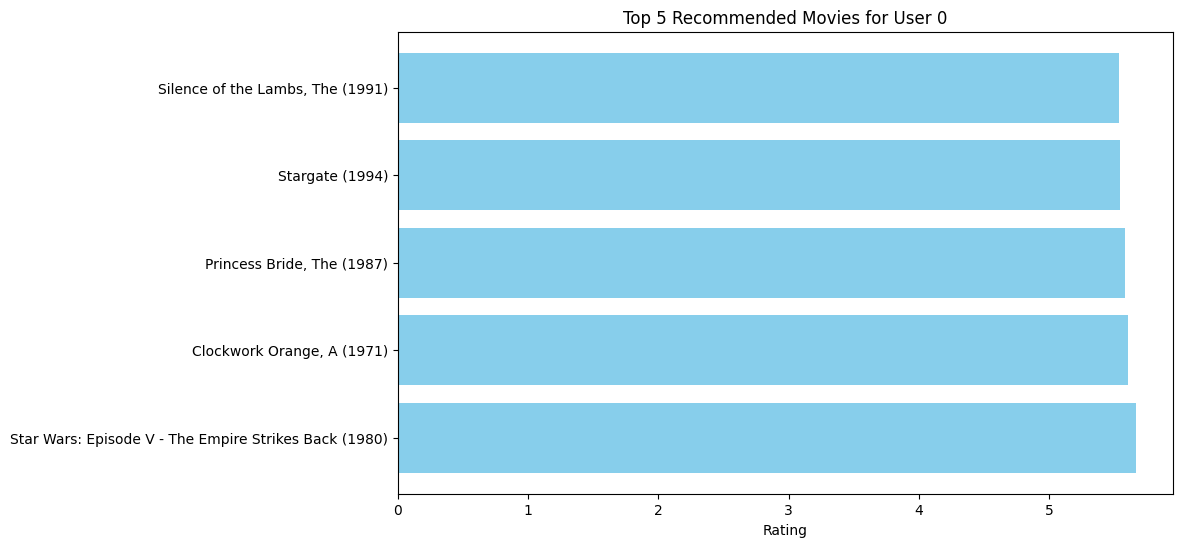

In [15]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame containing movie details
# Replace this with your actual DataFrame that contains movie titles
movie_details_df = merged_df["title"]

# Function to recommend movies for a specific user
def recommend_movies(user_idx, num_recommendations=5):
    # Generate movie indices for all movies
    all_movie_indices = np.arange(num_movies)

    # Repeat the user index for all movies
    user_indices = np.full_like(all_movie_indices, user_idx)

    # Make predictions for the specified user and all movies
    user_predictions = model.predict([user_indices, all_movie_indices])

    # Get the indices of the top recommendations
    top_indices = np.argsort(user_predictions[:, 0])[::-1][:num_recommendations]

    # Get movie titles and ratings for visualization
    recommended_movies = movie_details_df[top_indices]  # Directly use the column

    # Plot the recommendations
    plt.figure(figsize=(10, 6))
    plt.barh(recommended_movies, user_predictions[top_indices, 0], color='skyblue')
    plt.xlabel('Rating')
    plt.title(f'Top {num_recommendations} Recommended Movies for User {user_idx}')
    plt.show()

# Example: Recommend movies for user with index 0
user_idx_to_recommend = 0
recommend_movies(user_idx_to_recommend)


In [16]:
# Assuming you have a compiled NCF model named 'your_ncf_model'
# You should replace 'your_ncf_model' with the actual name of your NCF model

# Split the data into training and validation sets
train_data, val_data = train_test_split(merged_df, test_size=0.1, random_state=42)

# Train the NCF model
model.fit(
    [train_data['user_idx'].values, train_data['movie_idx'].values],
    train_data['rating'].values,
    epochs=10,
    batch_size=32,
    validation_data=(
        [val_data['user_idx'].values, val_data['movie_idx'].values],
        val_data['rating'].values
    )
)

# Evaluate the NCF model on the validation set
val_loss = model.evaluate(
    [val_data['user_idx'].values, val_data['movie_idx'].values],
    val_data['rating'].values
)

print(f'Validation Loss: {val_loss}')


Epoch 1/10
2836/2836 [==============================] - 9s 3ms/step - loss: 0.5726 - val_loss: 0.7453
Epoch 2/10
2836/2836 [==============================] - 8s 3ms/step - loss: 0.5471 - val_loss: 0.7423
Epoch 3/10
2836/2836 [==============================] - 7s 3ms/step - loss: 0.5263 - val_loss: 0.7593
Epoch 4/10
2836/2836 [==============================] - 9s 3ms/step - loss: 0.5081 - val_loss: 0.7656
Epoch 5/10
2836/2836 [==============================] - 7s 2ms/step - loss: 0.4911 - val_loss: 0.7726
Epoch 6/10
2836/2836 [==============================] - 8s 3ms/step - loss: 0.4763 - val_loss: 0.7929
Epoch 7/10
2836/2836 [==============================] - 7s 3ms/step - loss: 0.4618 - val_loss: 0.7939
Epoch 8/10
2836/2836 [==============================] - 8s 3ms/step - loss: 0.4505 - val_loss: 0.8053
Epoch 9/10
2836/2836 [==============================] - 8s 3ms/step - loss: 0.4380 - val_loss: 0.8064
Epoch 10/10
316/316 [==============================] - 1s 2ms/step - loss: 0.8133


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate the NCF model on the validation set
val_predictions = model.predict([val_data['user_idx'].values, val_data['movie_idx'].values])

# True ratings from the validation set
true_ratings = val_data['rating'].values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_ratings, val_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_ratings, val_predictions)
print(f'Mean Squared Error (MSE): {mse}')

316/316 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.687503082025316
Mean Squared Error (MSE): 0.8132533945058661


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame named 'merged_df' with columns 'user_idx', 'movie_idx', and 'rating'

# Split the data into training and validation sets
train_data, val_data = train_test_split(merged_df, test_size=0.1, random_state=42)

# Number of users and movies
num_users = len(merged_df['user_idx'].unique())
num_movies = len(merged_df['movie_idx'].unique())

# Initialize user and movie matrices with random values
user_matrix = np.random.rand(num_users, 10)  # Adjust the second dimension based on your choice
movie_matrix = np.random.rand(num_movies, 10)  # Adjust the second dimension based on your choice

# Hyperparameter: learning rate
learning_rate = 0.01

# Hyperparameter: number of iterations (epochs)
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    for index, row in train_data.iterrows():
        user_idx = row['user_idx']
        movie_idx = row['movie_idx']
        true_rating = row['rating']

        # Predict the rating
        predicted_rating = np.dot(user_matrix[user_idx], movie_matrix[movie_idx])

        # Calculate the error
        error = true_rating - predicted_rating

        # Update user and movie matrices using gradient descent
        user_matrix[user_idx, :] += learning_rate * (2 * error * movie_matrix[movie_idx, :])
        movie_matrix[movie_idx, :] += learning_rate * (2 * error * user_matrix[user_idx, :])

# Evaluate the baseline model on the validation set
val_predictions = np.sum(user_matrix[val_data['user_idx'].values] * movie_matrix[val_data['movie_idx'].values], axis=1)
val_true_ratings = val_data['rating'].values

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae_baseline = mean_absolute_error(val_true_ratings, val_predictions)
mse_baseline = mean_squared_error(val_true_ratings, val_predictions)

print(f'Baseline Model - Mean Absolute Error (MAE): {mae_baseline}')
print(f'Baseline Model - Mean Squared Error (MSE): {mse_baseline}')


Baseline Model - Mean Absolute Error (MAE): 0.7216642535126133
Baseline Model - Mean Squared Error (MSE): 0.8798727024271703
